In [43]:
from google.colab import files
import zipfile
uploaded = files.upload()

Saving dataset.xlsx to dataset (2).xlsx


In [44]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Specify the path to your Excel file
file_path = '/content/drive/MyDrive/dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
try:
    df = pd.read_excel(file_path)
    print("Excel file loaded successfully!")
    # Now you can work with your DataFrame
except FileNotFoundError:
    print(f"File not found at: {file_path}")
print(df.head())


Mounted at /content/drive
Excel file loaded successfully!
  category                                              image  season occasion
0      top  https://drive.google.com/file/d/1Q45BzQkd4FLla...  winter   casual
1      top  https://drive.google.com/file/d/1STn6A6_cySEt4...  summer   casual
2      top  https://drive.google.com/file/d/1oKww59fo9aZHe...  summer     work
3      top  https://drive.google.com/file/d/1dpUHjwzCWrQ6X...  summer    party
4   bottom  https://drive.google.com/file/d/1X8aDjwVk5KRug...  summer    party



Recommended Image URLs:
https://drive.google.com/file/d/1FXFdaaKke5V0n0jsQJ8v0mGTO9qOpLKN/view?usp=drive_link


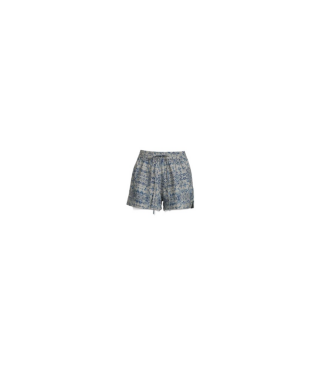

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Define user inputs
user_season = 'summer'
user_occasion = 'casual'
user_category = 'bottom'

data = [
    {'season': 'winter', 'occasion': 'casual', 'category': 'top', 'image_url': 'https://drive.google.com/file/d/1Q45BzQkd4FLlaUMi8DGxG_BrqthDywgI/view?usp=drive_link'},
    {'season': 'summer', 'occasion': 'casual', 'category': 'top', 'image_url': 'https://drive.google.com/file/d/1Q45BzQkd4FLlaUMi8DGxG_BrqthDywgI/view?usp=drive_link'},
    {'season': 'summer', 'occasion': 'work', 'category': 'top', 'image_url': 'https://drive.google.com/file/d/1oKww59fo9aZHepM7ZXVRHWaBylG6OmhT/view?usp=drive_link'},
    {'season': 'summer', 'occasion': 'party', 'category': 'top', 'image_url': 'https://drive.google.com/file/d/1dpUHjwzCWrQ6XOZkYenYcXXMzucF_55C/view?usp=drive_link'},
    {'season': 'summer', 'occasion': 'party', 'category': 'bottom', 'image_url': 'https://drive.google.com/file/d/1X8aDjwVk5KRugxYntUk4n83iM4Cj9p7K/view?usp=drive_link'},
    {'season': 'summer', 'occasion': 'casual', 'category': 'bottom', 'image_url': 'https://drive.google.com/file/d/1FXFdaaKke5V0n0jsQJ8v0mGTO9qOpLKN/view?usp=drive_link'},
    {'season': 'winter', 'occasion': 'casual', 'category': 'bottom', 'image_url': 'https://drive.google.com/file/d/1SLnBlOx3KqZAkRlYvVOg8z0f7hDuEcqL/view?usp=drive_link'},
    {'season': 'summer', 'occasion': 'work', 'category': 'bottom', 'image_url': 'https://drive.google.com/file/d/1cm48Px7qbh-_x0bdoy3cVr6fAE16-Q4z/view?usp=drive_link'}

]

def convert_to_direct_link(drive_link):
    file_id = drive_link.split('/d/')[1].split('/')[0]
    direct_link = f'https://drive.google.com/uc?export=download&id={file_id}'
    return direct_link

def recommend_images(data, season, occasion, category):
    # Filter the data based on user inputs
    filtered_data = [item for item in data if item['season'] == season and
                     item['occasion'] == occasion and item['category'] == category]

    # Get the image URLs
    recommended_image_urls = [item['image_url'] for item in filtered_data]

    # Print recommended image URLs (debugging)
    print("\nRecommended Image URLs:")
    for img_url in recommended_image_urls:
        print(img_url)

    # Load images using their URLs
    recommended_images = []
    for img_url in recommended_image_urls:
        direct_link = convert_to_direct_link(img_url)
        response = requests.get(direct_link)

        # Check if the request was successful
        if response.status_code == 200:
            try:
                img = Image.open(BytesIO(response.content))
                recommended_images.append(np.array(img))
            except Exception as e:
                print(f"Error processing image from {img_url}: {e}")
        else:
            print(f"Warning: Failed to download image from {img_url}")

    return recommended_image_urls, recommended_images

# Call recommend_images function
recommended_image_urls, recommended_images = recommend_images(data, user_season, user_occasion, user_category)

# Display the recommended images
for img_url, img in zip(recommended_image_urls, recommended_images):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

